<a href="https://colab.research.google.com/github/wbandabarragan/quantum-mechanics-1/blob/main/python-resources/python_for_QM03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 3: Python for Quantum Mechanics

## 1. Mount our Google Drive (only in Google Colab)

In [82]:
# Import drive

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
# Check what we have in our drives:
#!pwd
# !ls /content/drive/MyDrive/'Colab Notebooks'/plane_waves

# !ls -ltr /content/drive/MyDrive/"Colab Notebooks"

## Problem 1. 1D Plane Waves

$$p(x,t) = A\cos[k\,x\pm\omega\,t]$$

where:

$A\equiv$ amplitude

$k=\frac{2\pi}{\lambda}=\frac{p}{\hbar}$

$\omega = 2\pi\nu = \frac{2\pi}{T} =\frac{E}{\hbar}$


$$\Rightarrow p(x,t) = A\cos\left[2\,\pi\left(\frac{x}{\lambda}\pm\frac{t}{T}\right)\right]$$

In [84]:
# Import libraries

import numpy as np

import matplotlib.pyplot as plt

$$p(x,t) = A\cos\left[2\,\pi\left(\frac{x}{\lambda}\pm\frac{t}{T}\right)\right]$$

In [85]:
# Create a funtion for p(x,t)

def plane_wave(a, l, p, x, t): # arguments of the function
  """
  This is function that allows us to construct plane waves.
  Inputs: a-> Amplitude, l-> Wavelength, p-> Period, x-> position coord., t-> time coord.
  Ouput: p_xt -> plane wave
  """
  # Our funtion is:
  p_xt = a*np.cos(2*np.pi*(x/l - t/p))

  return p_xt

In [86]:
# Create an example for wave 1
a_wave1 = 1.
l_wave1 = 2.
p_wave1 = 0.5

# Fix the time
t = 0.

# Vector for the x coordinate
x = np.linspace(-5., +5., 1000)

# print(x[-1])

In [87]:
# Evaluate our plane wave function

pw_1 = plane_wave(a_wave1, l_wave1, p_wave1, x, t)

# print(x.shape, pw_1.shape)

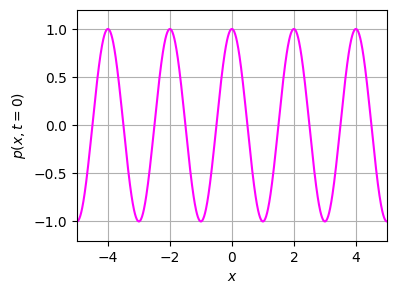

In [88]:
# Plotting our wave 1
# Figure environment
plt.figure(figsize = (4,3))

plt.plot(x, pw_1, color = "magenta", linestyle = "-")

plt.xlim(-5., +5.)
plt.ylim(-1.2, +1.2)

plt.xlabel(r"$x$")
plt.ylabel(r"$p(x,t=0)$")

plt.grid()

plt.show()

### To evaluate the same function for time, we need lists and a loop:

In [89]:
# Let's create our time vector
t_vector = np.linspace(0., 10., 100)

print(len(t_vector))

# Our WRONG way to evaluate the function
# pw_try = plane_wave(a_wave1, l_wave1, p_wave1, x, t_vector)

100


In [90]:
# Create an empty list
all_pw = []

# Use a loop to fill in the evaluated values for pw
for i in range(len(t_vector)):
  #print(t_vector[i])
  all_pw.append(plane_wave(a_wave1, l_wave1, p_wave1, x, t_vector[i]))

# Convert the list to an array
all_pw = np.array(all_pw)

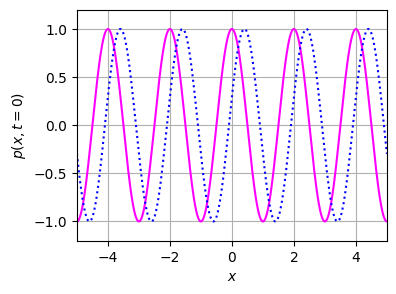

In [91]:
# Plotting our wave slns
# Figure environment
plt.figure(figsize = (4,3))

plt.plot(x, pw_1, color = "magenta", linestyle = "-")
plt.plot(x, all_pw[1], color = "blue", linestyle = ":")

plt.xlim(-5., +5.)
plt.ylim(-1.2, +1.2)

plt.xlabel(r"$x$")
plt.ylabel(r"$p(x,t=0)$")

plt.grid()

plt.show()

### Saving a file into our Google Drives:

In [92]:
# Plotting our wave slns
# Figure environment
plt.figure(figsize = (4,3))

plt.plot(x, pw_1, color = "magenta", linestyle = "-")
plt.plot(x, all_pw[1], color = "blue", linestyle = ":")

plt.xlim(-5., +5.)
plt.ylim(-1.2, +1.2)

plt.xlabel(r"$x$")
plt.ylabel(r"$p(x,t=0)$")

plt.grid()

plt.savefig("/content/drive/MyDrive/Colab Notebooks/plane_waves/test.png")

plt.close()

### Looping over times:

In [93]:
# Test the number formatting

#for j in range(len(all_pw)):

  #print("{:02d}".format(j))

In [94]:
# For loop for time

for j in range(len(all_pw)):
  #print(all_pw[j].shape)
  # Figure environment
  plt.figure(figsize = (8,6))

  plt.plot(x, all_pw[j], color = "blue", linestyle = "-", linewidth = 2)

  plt.xlim(-5., +5.)
  plt.ylim(-1.2, +1.2)

  plt.xlabel(r"$x$")
  plt.ylabel(r"$p(x,t=0)$")

  plt.grid()

  plt.savefig("/content/drive/MyDrive/Colab Notebooks/plane_waves/pw_{:02d}.png".format(j))

  plt.close()



### Animating our plane wave:

In [95]:
import glob

from PIL import Image # Pillow library -> PIL

from IPython import display # To see the animation in our nb

In [96]:
# Animation

# Indicate the input/output paths
images_input = "/content/drive/MyDrive/Colab Notebooks/plane_waves/pw_**.png"
gif_output   = "/content/drive/MyDrive/Colab Notebooks/plane_waves/pw3.gif"

# Collect the images
imgs = (Image.open(f) for f in sorted(glob.glob(images_input)))

img  = next(imgs)

# Export img in GIF format
img.save(fp = gif_output, format = "GIF", append_images = imgs, save_all = True, duration = 250, loop = 0)

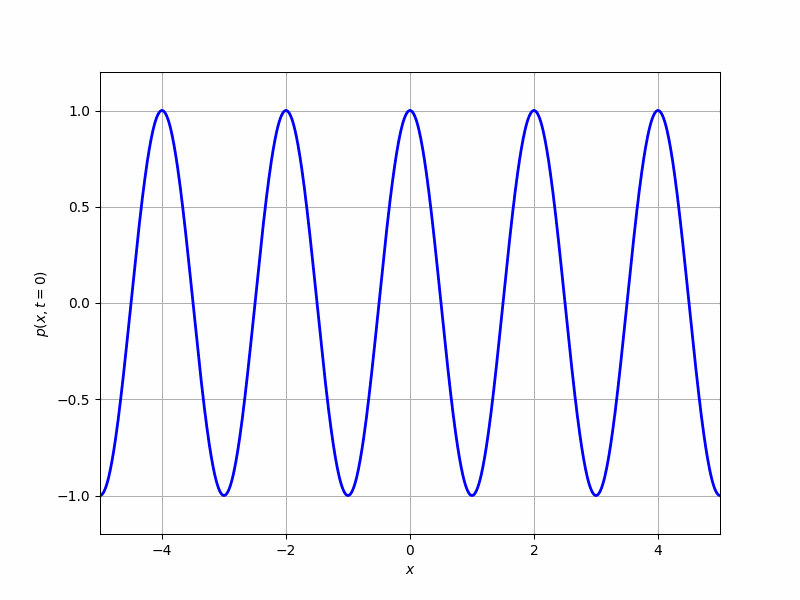

In [97]:
# Display our plane wave solution in our python notebook

display.Image(open("/content/drive/MyDrive/Colab Notebooks/plane_waves/pw3.gif", "rb").read())